# Simple Linear Regression

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("/Users/udit/git projects/ML---Implimentations/Linear Regression/height-weight.csv")

In [49]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [50]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

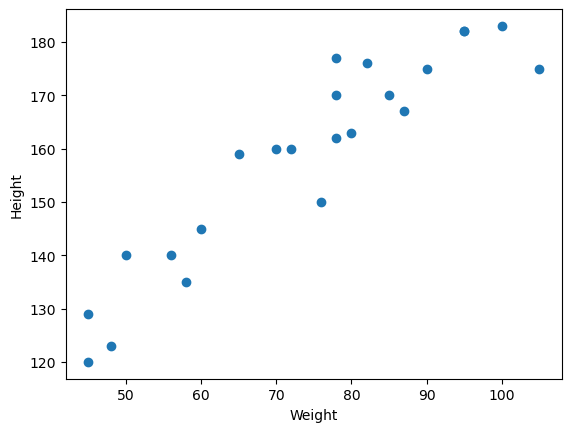

In [51]:
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')


<Axes: >

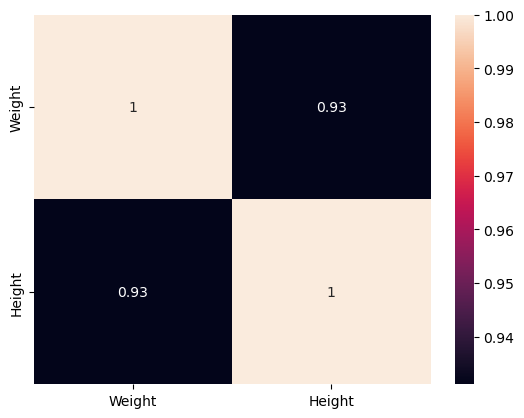

In [52]:
sns.heatmap(df.corr(), annot=True)

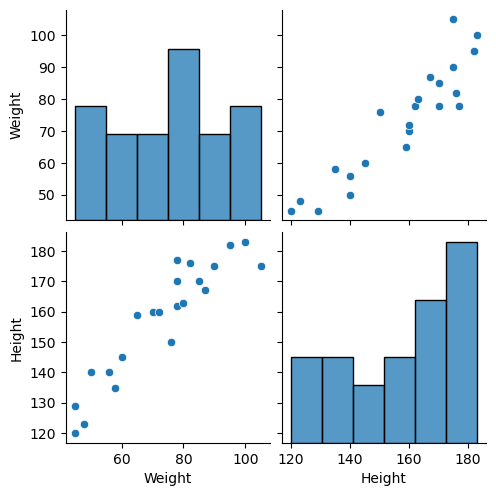

In [53]:
sns.pairplot(df)

In [54]:
X = df[['Weight']] # Independent feature should be DataFrame or in two 2 Dimentional
y = df['Height'] # This can be series or 1 Dimentional

In [55]:
print(np.array(X).shape)
print(np.array(y).shape)

(23, 1)
(23,)


In [56]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
print("Coefficent or slope :",model.coef_)
print("Intercept :",model.intercept_)

Coefficent or slope : [17.03440872]
Intercept : 157.5


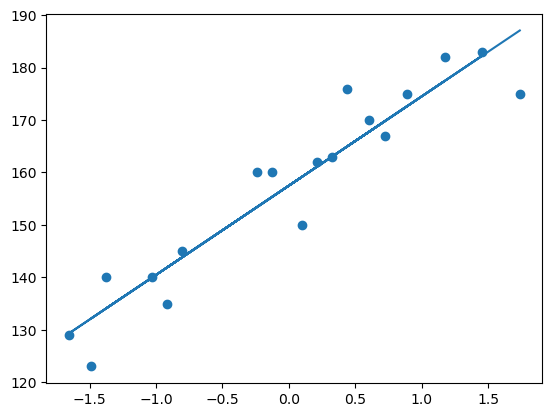

In [60]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

In [61]:
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)

Score : 0.7769869860423441
Addjusted R2 score : 0.7026493147231254
mean_absolute_error : 9.822657814519227
mean_squared_error : 109.77592599051654
root_mean_squared_error 10.477400726827076


# OLS Linear Regression

In [63]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [64]:
import statsmodels.api as sm 
Ols_model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [65]:
print(Ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                       0.661
Time:                        21:32:07   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction for new data

In [66]:
model.predict(sc.transform([[70]]))

array([153.38030364])